In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd

In [8]:
X = pd.read_hdf('data/train_transformed.h5')
y = X['target'].copy()
del X['target']

model = ensemble.RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(X, y)

importance = pd.DataFrame({
    'importance': model.feature_importances_,
    'feature': X.columns}).sort_values('importance', ascending=False)

Text(0,0.5,'Importance')

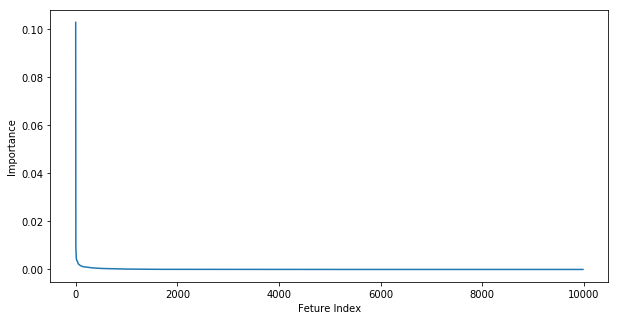

In [9]:
importance.reset_index()['importance'].plot(figsize=[10,5])
plt.xlabel('Feture Index')
plt.ylabel('Importance')

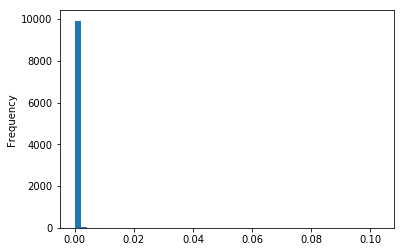

In [10]:
importance['importance'].plot(kind='hist', bins=50)

In [11]:
(importance['importance']>0).sum()

5344

In [12]:
importance = importance.set_index('feature')
importance.to_hdf('data/importance.h5', 'data')